## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
len(df.query('(group == "treatment" and landing_page != "new_page") or (landing_page == "new_page" and group != "treatment")'))

3893

f. Do any of the rows have missing values?

In [7]:
df.isna().sum()
# None of the rows have missing values.

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
to_be_removed = df.query('(group == "treatment" and landing_page != "new_page") or (landing_page == "new_page" and group != "treatment")').index

In [9]:
df2 = df.drop(to_be_removed)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# We can consider a user repeated if number of unique users is less than dataframe row size
df2['user_id'].nunique() < len(df2)

True

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.duplicated(subset=["user_id"])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop_duplicates(subset=["user_id"], inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df['converted'].mean()

0.11965919355605512

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# Probability of being in control group
p_control = len(df2[df2['group'] == 'control']) / len(df2)

In [17]:
p_treatment = len(df2[df2['group'] == 'treatment']) / len(df2)
p_treatment

0.5000619442226688

In [18]:
# Sum of probabilities should be 1
(p_control + p_treatment) == 1

True

In [19]:
converted = df2[df2['converted'] == 1]
converted.shape[0]

34753

In [20]:
# 17489 converted intersec control
p_converted_and_control =  len(df2.query("group == 'control' and converted == 1")) / len(df2)
p_converted_and_control

0.06018569501417834

In [21]:

# Probability of converted given group control
p_converted_and_control / p_control

0.12038630450046119

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
# converted intersect treatment
p_converted_and_treatment = len(df2.query("group == 'treatment' and converted == 1")) / len(df2)
p_converted_and_treatment

0.05941139223081794

In [23]:
# Probability of converted given group treatment
p_converted_and_treatment / p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [24]:
# It is the same probability as being in group 'treatment'
p_treatment

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

    From the above probability study, there is no clear evidence that a user converts due to he sees the "new" landing page. Indeed, there is a slight higher probability than a user converts given that sees "old page". I would suggest to keep running experiment for a while before running a probability study again and decide which page makes people convert more, or even discard the idea that landing page influences people to convert.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{old} \geq  p_{new} $$


$$H_1: p_{old} <  p_{new} $$

Where $\alpha = 5\%$   and   $p_{value} < \alpha$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [25]:
p_new_rate = len(df[df['converted'] == 1]) / len(df['converted'])
p_new_rate

0.11965919355605512

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old_rate = len(df[df['converted'] == 1]) / len(df['converted'])
p_old_rate

0.11965919355605512

c. What is $n_{new}$?

In [27]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [28]:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
# with convert rate of 0.1196 and population of 145310, we can simulate a
# binomial distribution

new_page_converted = np.random.binomial(1, p_new_rate, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
# with convert rate of 0.1196 and population of 145274, this is the simulation
# of binomial distribution

old_page_converted = np.random.binomial(1, p_old_rate, n_old)
old_page_converted

array([0, 0, 0, ..., 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
p_new - p_old

0.001009905418681567

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [32]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new_rate, n_new)
    old_page_converted = np.random.binomial(1, p_old_rate, n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

    I expected this plot, given the Central Limit Theorem which states that with a large enough sample size (10000 in this case), the sampling distribution (in this case of differences of means) tends to get normally distributed.

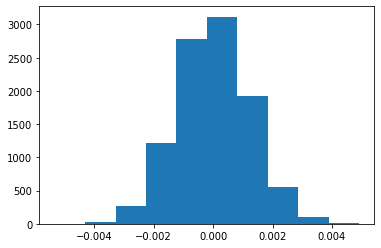

In [33]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
# Observed difference in actual ab_data
obs_p_old_rate = df2.query("group == 'control'")['converted'].mean()
obs_p_new_rate = df2.query("group == 'treatment'")['converted'].mean()
obs_diff = obs_p_new_rate - obs_p_old_rate

In [35]:
obs_diff

-0.0015782389853555567

Observed  $p_{new}$ - $p_{old}$ = -0.00157

Proportion of p_diffs greater that the observed data:

In [36]:
len([diff for diff in p_diffs if diff > obs_diff]) / len(p_diffs)

0.9058

In [37]:
p_diffs = np.array(p_diffs)
(p_diffs <= obs_diff).mean()

0.0942

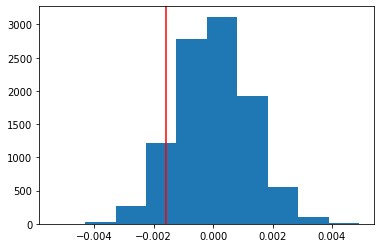

In [38]:
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='red')

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

    This proportion value is formally called p-value of an null hypothesis. P-value is the probability of seeing the apparent effect (our apparent effect is a difference between convert rates for old and new pages) if the null hypothesis is true (in our case that there is no difference between both convert rates). If p-value is low, the apparent effect is statistically significant, which means that it did not happen by chance.
    In this particular study, we got a p-value = .0945 which means that is around 90% common to see approximately the same convert coverage for new and old pages, or even slighly more rate coverage for old ones (Because our observed diff is negative).
    

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control' and converted == 1").shape[0]
convert_new = df2.query("group == 'treatment' and converted == 1").shape[0]
n_old = df2.query("group == 'control'").shape[0]
n_new = df2.query("group == 'treatment'").shape[0]

In [40]:
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [41]:
from statsmodels.stats.proportion import proportions_ztest

zscore, pvalue = proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
zscore, pvalue

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

    ZScore is a measure of standard deviation. It is a test of statistical significance that helps us to decide whether or not to reject a null hypothesis. Very high positive/negative zcore associated with very small p-value indicates it is very unlikely that the observed difference (our difference of conversions from new and old pages) is part of the null hypothesis. In this case we have pretty small z-score and way large p-value which means our observation is quite common. We do not have statistical evidence that new page is a factor for users to convert.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

    Logistic Regression, as is a regression approach used to predict only 2 possible outcomes. In this case if a user converted or not given presented page.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

In [43]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [44]:
y = df2['converted']
X = df2[['intercept', 'ab_page']]
logistic_model = sm.Logit(y, X)
results = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        13:40:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

We get a $p_{value}$ = 0.19 which is not statistically significant to decide if there is a difference of users converted given a new_page. In **Part II** we obtained $p_{value}$ = 0.0938 and it basically differs because in this logistic regression our hypotheses are:

$$H_0: p_{old} =  p_{new} $$


$$H_1: p_{old} \neq  p_{new} $$


In **Part II** hypotheses are:

$$H_0: p_{old} \geq  p_{new} $$


$$H_1: p_{old} <  p_{new} $$


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

    Consider other factors to the regression models would be benefitial as we would get more insight to compare how individual factors (keeping everyting else constant) influence final decision of a user to convert. Factors such as convert daytime, weekday/weekend, total time a given user have used the product or if there is a sort of promotion at the moment user converts, could help to understand users habits.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

FileNotFoundError: [Errno 2] File b'./countries.csv' does not exist: b'./countries.csv'

In [ ]:
df_new[['country_ca', 'country_uk', 'country_us']] = pd.get_dummies(df_new['country'])

In [ ]:
df_new.groupby('converted').mean()

In [ ]:
# For the logistics model, we are going to choose US as our country category baseline 
# given that is the one which has more converts.
y = df_new['converted']
X = df_new[['intercept', 'ab_page', 'country_ca', 'country_uk']]
lm_country = sm.Logit(y, X)
results = lm_country.fit()
results.summary()

In [ ]:
np.exp(-0.0149)

In [ ]:
# Interpret results for ab_page
1 / np.exp(-0.0149)

_Above was a reciprocal factor which we could interpreter as if an user receives old page, there is 1.01 times more likely to convert than if they were received new page._

_Also, we can see high p-value for ca and uk users, 0.13 and 0.457 respectively. This suggests that those 2 factors are not significant in predicting if a user will convert or not_

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [ ]:
df_copy = df_new.copy()

In [ ]:
# Let's create additional interaction columns by applying masking first to all combinations
df_copy["uk_control"] = (df_copy["country"] == "UK") & (df_copy["group"] == "control")
df_copy["uk_treatment"] = (df_copy["country"] == "UK") & (df_copy["group"] == "treatment")
df_copy["ca_control"] = (df_copy["country"] == "CA") & (df_copy["group"] == "control")
df_copy["ca_treatment"] = (df_copy["country"] == "CA") & (df_copy["group"] == "treatment")

In [ ]:
# Then apply dummy variables to normalize booleans into integers
df_copy['uk_control'] = pd.get_dummies(df_copy['uk_control']).iloc[:,1]
df_copy['uk_treatment'] = pd.get_dummies(df_copy['uk_treatment']).iloc[:,1]
df_copy['ca_control'] = pd.get_dummies(df_copy['ca_control']).iloc[:,1]
df_copy['ca_treatment'] = pd.get_dummies(df_copy['ca_treatment']).iloc[:,1]

In [ ]:
### Fit Your Linear Model And Obtain the Results
y = df_copy['converted']
X = df_copy[['intercept', 'ab_page', 'uk_control', 'uk_treatment', 'ca_control', 'ca_treatment']]
lm_country = sm.Logit(y, X)
results = lm_country.fit()
results.summary()

In [ ]:
y = df_copy['converted']
X = df_copy[['intercept', 'uk_control', 'uk_treatment', 'ca_control', 'ca_treatment']]
lm_country = sm.Logit(y, X)
results = lm_country.fit()
results.summary()

    Again, we see high p_values and very small z scores for combinations of (country-page), being the highest uk_control with a p_value = 0.760 with z-score 0.257 which means there is no statistical significance to infer that given combination is a factor for users to convert.

<a id='conclusions'></a>
## Conclusions

We can conclude after running AB tests, that new page does not seem to influence users to convert.
It is interesting to see diverse ways we can take to infer same results such as 
- Pure probability rules
- Hypothesis testing
- Regression
- Z scores using built in libs such as statsmodels.proportions_ztest